# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

# Importing the Dataset 

The heart data is taken from the Kaggle https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Preprocessing 

In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Checking for any missing value in the dataset

In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Splitting the Target and features 

In [7]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
X.shape

(1025, 13)

In [10]:
Y.shape

(1025,)

# Splitting the data into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) 

In [12]:
print("Original Data :",X.shape,"\nTraining Data :",X_train.shape,"\nTest Data :",X_test.shape)

Original Data : (1025, 13) 
Training Data : (820, 13) 
Test Data : (205, 13)


# Model training 

Using the Logistic Regression for training the model to make prediction for the presence of heart disease

In [13]:
model = LogisticRegression()

Now training the model using the training data we have

In [14]:
model.fit(X_train, y_train)

C:\Users\nites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

Using the Accuracy score for the evaluation

first find the accuracy score for the training data

In [15]:
training_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_prediction,y_train)

In [16]:
print("The accuracy on the training data is : ",training_data_accuracy)

The accuracy on the training data is :  0.8524390243902439


Now Checking the accuracy score on the test data

In [17]:
test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_prediction,y_test)

In [18]:
print("The accuracy on the test data is : ",test_data_accuracy)

The accuracy on the test data is :  0.8048780487804879


# Building a predictive system

In [19]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

data  = np.asarray(input_data)

data_reshaped = data.reshape(1,-1)

prediction = model.predict(data_reshaped)

C:\Users\nites\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
print(prediction) # 1 is the true value

if(prediction[0]==0):
    print("The person does not have a heart disease")

else:
    print("The person have a heart disease")
        

[1]
The person have a heart disease


In [21]:
from sklearn.metrics import confusion_matrix 

In [22]:
cf_matrix = confusion_matrix(y_test, test_prediction)
print(cf_matrix)

[[72 28]
 [12 93]]


In [24]:
tp, fp, fn, tn = cf_matrix.ravel()
print(tp,fp,fn,tn)

72 28 12 93


<AxesSubplot:>

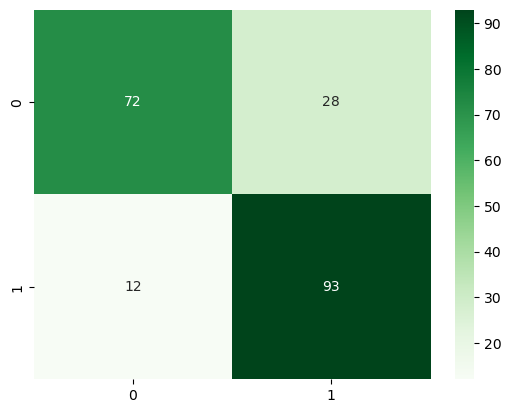

In [28]:
import seaborn as sns
sns.heatmap(cf_matrix, cmap="Greens", annot=True)